# Exporation data of le "Vrai débat"

In [40]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
col_selection = ['contribution_versions_title', 'contribution_versions_bodyText', 'contributions_votesCount', 'contributions_votesCountOk', 'contributions_votesCountMitige', 'contributions_votesCountNok', 'contributions_argumentsCountFor', 'contributions_argumentsCountAgainst']
col_master = ['master_tag', *col_selection]

In [3]:
data_path = Path('csv_anonymes')

In [4]:
files = ['2019-03-04_democratie-institutions-referendum-dinitiative-citoyenne_consultation.csv',
'2019-03-04_economie-finances-travail-compte-public_consultation-6.csv',
'2019-03-04_education-jeunesse-enseignement-superieur-recherche-et-innovation_consultation-7.csv',
'2019-03-04_europe-affaires-etrangeres-outre-mer_consultation-4.csv',
'2019-03-04_justice-police-armee_consultation-3.csv',
'2019-03-04_sante-solidarite-handicap_consultation-5.csv',
'2019-03-04_sport-culture_consultation-8.csv',
'2019-03-06_expression-libre_consultation-9.csv',
'2019-03-06_transition-ecologique-solidaire-agriculture-alimentation_consultation-2.csv']

In [25]:
df_files = []
tag_regex = re.compile(r"2019\-03\-0[0-9]_([\w\-]+)_consultation(\-[0-9]+)?\.csv")
for file in files:
    tag = tag_regex.match(file).groups()[0]
    print(tag)
    df_file_raw = pd.read_csv(data_path / file)
    df_file_sel = df_file_raw.loc[(df_file_raw.type == 'opinion') & (df_file_raw.contribution_versions_title.str.len() > 0), col_selection]
    df_file_sel['master_tag'] = tag
    df_files.append(df_file_sel[col_master])
    
df = pd.concat(df_files)

democratie-institutions-referendum-dinitiative-citoyenne
economie-finances-travail-compte-public
education-jeunesse-enseignement-superieur-recherche-et-innovation
europe-affaires-etrangeres-outre-mer
justice-police-armee
sante-solidarite-handicap
sport-culture
expression-libre


/Users/antoinehue/Library/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,34,35,36,39,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


transition-ecologique-solidaire-agriculture-alimentation


/Users/antoinehue/Library/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12,13,34,35,36,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Raw file structure

In [26]:
df_file_raw.columns

Index(['type', 'contributions_id', 'contributions_author_id',
       'contributions_section_title', 'contributions_title',
       'contributions_bodyText', 'contributions_createdAt',
       'contributions_updatedAt', 'contributions_url',
       'contributions_published', 'contributions_trashed',
       'contributions_trashedStatus', 'contributions_trashedAt',
       'contributions_trashedReason', 'contributions_votesCount',
       'contributions_votesCountOk', 'contributions_votesCountMitige',
       'contributions_votesCountNok', 'contributions_argumentsCount',
       'contributions_argumentsCountFor',
       'contributions_argumentsCountAgainst', 'contributions_sourcesCount',
       'contributions_versionsCount', 'contributions_arguments_related_id',
       'contributions_arguments_related_kind', 'contributions_arguments_id',
       'contributions_arguments_author_id', 'contributions_arguments_type',
       'contributions_arguments_body', 'contributions_arguments_createdAt',
       '

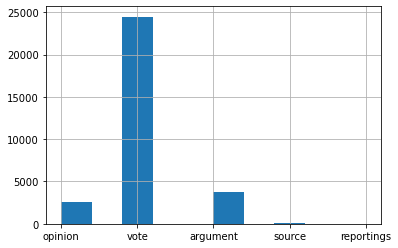

In [27]:
df_file_raw.type.hist()

# Combined file analysis

In [28]:
df.sort_values('contributions_votesCount', ascending=False).head(10)

,master_tag,contribution_versions_title,contribution_versions_bodyText,contributions_votesCount,contributions_votesCountOk,contributions_votesCountMitige,contributions_votesCountNok,contributions_argumentsCountFor,contributions_argumentsCountAgainst
136940,democratie-institutions-referendum-dinitiative...,Référendum d'Initiative Citoyenne,On ne peut plus accepter que quelques personne...,5694.0,5181.0,214.0,299.0,626.0,187.0
143678,democratie-institutions-referendum-dinitiative...,Prise en compte du vote blanc ou nul en tant q...,Lorsqu'une moitié de nos concitoyen(ne)s ne vo...,4932.0,4385.0,341.0,206.0,367.0,169.0
157653,economie-finances-travail-compte-public,Nationaliser les autoroutes amorties,Toutes les autoroutes construites dans les ann...,4292.0,4116.0,67.0,109.0,213.0,61.0
111231,expression-libre,Suppression de la loi autorisant le mariage ho...,La loi autorisant le mariage homosexuel a été ...,4049.0,552.0,74.0,3423.0,744.0,486.0
129669,democratie-institutions-referendum-dinitiative...,REDUIRE LE TRAIN DE VIE DE L'ENSEMBLE DES ELUS,"1) Arrêt de tous les avantages (salaires, inde...",4020.0,3702.0,203.0,115.0,346.0,125.0
144315,economie-finances-travail-compte-public,Suppression des rémunérations de tous les élus...,"A l'heure ou l'état cherche de l'argent, il se...",3876.0,3703.0,100.0,73.0,214.0,58.0
138309,economie-finances-travail-compte-public,"Suppression du CICE, retour de l'ISF, chasse à...",Je propose une suppression du CICE (coût de 20...,3818.0,3474.0,99.0,245.0,231.0,145.0
167574,expression-libre,nationalisation des autoroutes.,marre de payer les autoroutes hors de prix. Ge...,3410.0,3272.0,56.0,82.0,215.0,47.0
113175,democratie-institutions-referendum-dinitiative...,Casier vierge pour les élus,1) Nécessité d'avoir un casier vierges au même...,3355.0,3167.0,116.0,72.0,165.0,50.0
70979,democratie-institutions-referendum-dinitiative...,Fin du salaire à vie du président,Fin du maintient du salaire à vie du président...,3119.0,3004.0,85.0,30.0,132.0,31.0


Text(0.5, 1.0, 'Nombre de votes pour tous les opinions avec nombre de vote > 100')

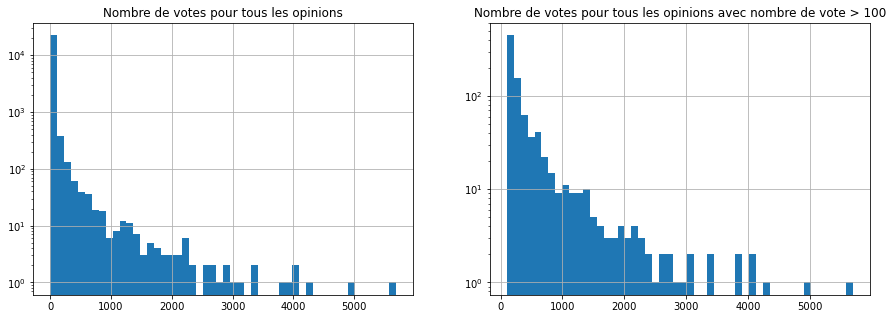

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = axes[0]
df.contributions_votesCount.hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_title('Nombre de votes pour tous les opinions')
ax = axes[1]
df.contributions_votesCount[df.contributions_votesCount > 100].hist(ax=ax, bins=50)
ax.set_yscale('log')
ax.set_title('Nombre de votes pour tous les opinions avec nombre de votes > 100')

In [38]:
df_stats = pd.concat([df[['master_tag', 'contribution_versions_title']].groupby('master_tag').count(),
                      df[['master_tag', 'contributions_votesCount']].groupby('master_tag').sum(),
                      df[['master_tag', 'contributions_votesCountOk']].groupby('master_tag').sum(),
                      df[['master_tag', 'contributions_votesCountMitige']].groupby('master_tag').sum(),
                      df[['master_tag', 'contributions_argumentsCountFor']].groupby('master_tag').sum(),
                      df[['master_tag', 'contributions_argumentsCountAgainst']].groupby('master_tag').sum()], axis=1)
df_stats.sort_values('contributions_votesCount', ascending=False)

,contribution_versions_title,contributions_votesCount,contributions_votesCountOk,contributions_votesCountMitige,contributions_argumentsCountFor,contributions_argumentsCountAgainst
master_tag,,,,,,
expression-libre,3769,165090.0,123143.0,8278.0,11399.0,7805.0
economie-finances-travail-compte-public,6410,154551.0,129428.0,6681.0,10856.0,6457.0
democratie-institutions-referendum-dinitiative-citoyenne,4063,132063.0,104900.0,7432.0,9210.0,6179.0
education-jeunesse-enseignement-superieur-recherche-et-innovation,1581,58864.0,42265.0,3748.0,3451.0,3004.0
europe-affaires-etrangeres-outre-mer,963,48031.0,33354.0,2490.0,2421.0,2401.0
sante-solidarite-handicap,1900,40866.0,31166.0,1684.0,2620.0,1506.0
justice-police-armee,1400,28707.0,21075.0,1377.0,1492.0,1336.0
sport-culture,593,27291.0,18367.0,1897.0,1493.0,1317.0
transition-ecologique-solidaire-agriculture-alimentation,2600,24475.0,19568.0,1372.0,2356.0,1419.0


In [39]:
df.to_parquet('leVraiDebat-opinions.parquet', compression='GZIP')